## Dataset loading

In [1]:
from sklearn import datasets

In [2]:
houses = datasets.fetch_california_housing()

In [3]:
import numpy as np

## Linear regression: Scikit Learn

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()

In [6]:
reg.fit(houses.data, houses.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
houses.data.shape, houses.target.shape

((20640, 8), (20640,))

In [8]:
houses.data[0].reshape(1, -1).shape

(1, 8)

In [9]:
for index in range(10):
    sample = houses.data[index].reshape(1, -1)
    actual = houses.target[index]
    predicted = reg.predict(sample)
    error = abs(predicted[0]-actual)

    print("Price. Predicted: {:.3f} Actual: {:.3f} Error: {:.3f}".format(predicted[0], actual, error))

Price. Predicted: 4.132 Actual: 4.526 Error: 0.394
Price. Predicted: 3.977 Actual: 3.585 Error: 0.392
Price. Predicted: 3.677 Actual: 3.521 Error: 0.156
Price. Predicted: 3.242 Actual: 3.413 Error: 0.171
Price. Predicted: 2.414 Actual: 3.422 Error: 1.008
Price. Predicted: 2.675 Actual: 2.697 Error: 0.022
Price. Predicted: 2.395 Actual: 2.992 Error: 0.597
Price. Predicted: 2.247 Actual: 2.414 Error: 0.167
Price. Predicted: 1.792 Actual: 2.267 Error: 0.475
Price. Predicted: 2.428 Actual: 2.611 Error: 0.183


## Linear regression: PyTorch

In [10]:
import torch

In [11]:
from torch.autograd import Variable

In [12]:
# define linear model
class TorchLinearRegression(torch.nn.Module):
    
    def __init__(self, num_in, num_out, bias=True):
        super().__init__()
        self.linear = torch.nn.Linear(num_in, num_out, bias=bias)
        
    def forward(self, x):
        return self.linear(x)
    

In [14]:
def print_parameters(model_instance):
    for p in model_instance.parameters():
        print(p)
# print_parameters(model)

In [31]:
learning_rate = 0.01
momentum = 0.9
epochs = 2000
print_every = 200
reduce_lr_every = 100

In [24]:
help(torch.optim.SGD)

Help on class SGD in module torch.optim.sgd:

class SGD(torch.optim.optimizer.Optimizer)
 |  Implements stochastic gradient descent (optionally with momentum).
 |  
 |  Nesterov momentum is based on the formula from
 |  `On the importance of initialization and momentum in deep learning`__.
 |  
 |  Args:
 |      params (iterable): iterable of parameters to optimize or dicts defining
 |          parameter groups
 |      lr (float): learning rate
 |      momentum (float, optional): momentum factor (default: 0)
 |      weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
 |      dampening (float, optional): dampening for momentum (default: 0)
 |      nesterov (bool, optional): enables Nesterov momentum (default: False)
 |  
 |  Example:
 |      >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
 |      >>> optimizer.zero_grad()
 |      >>> loss_fn(model(input), target).backward()
 |      >>> optimizer.step()
 |  
 |  __ http://www.cs.toronto.edu/%7

In [26]:
def normalize(samples):
    print("Normalizing {} samples".format(len(samples)))
    max_values = samples.max(axis=0)
    min_values = samples.min(axis=0)

    samples_normalized = (samples - min_values) / (max_values - min_values)

    # sanity check
    assert np.all(samples_normalized.max(axis=0) == 1.)
    assert np.all(samples_normalized.min(axis=0) == 0.)
    
    return samples_normalized

In [27]:
def data_to_tensors(np_inputs, np_outputs, normalize_inputs=True):
    
    x = np_inputs.astype(np.float32)
    y_target = np_outputs.reshape(-1, 1).astype(np.float32)  # force explicit batch dimension: -> (20640, 1)

    if normalize_inputs:
        x = normalize(np_inputs).astype(np.float32)
    
    x = torch.from_numpy(x)
    y_target = torch.from_numpy(y_target)
    
    return x, y_target

x, y_target = data_to_tensors(houses.data, houses.target)
x.dtype, y_target.dtype
# x.shape, y_target.shape

Normalizing 20640 samples


(torch.float32, torch.float32)

In [52]:
loss_values = {}

for learning_rate in [0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    print("=== Learning rate {} ===".format(learning_rate))
    loss_values[learning_rate] = []
    
    # model = TorchLinearRegression(8, 1)
    model = torch.nn.Linear(8, 1)

    loss_function = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    for i in range(epochs):

        outputs = model(x)

        # compute loss
        loss = loss_function(outputs, y_target)

        # clear gradients each step
        optimizer.zero_grad()

        # backprop error
        loss.backward()

        if i % print_every == 0:
            print("{:5d}: Loss {:.3f}".format(i, loss.item()))

        loss_values[learning_rate].append(loss.item())

        # optimize step
        optimizer.step()
#     print_parameters(model)

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
#     with torch.no_grad():
#         for param in model.parameters():
#             param -= learning_rate * param.grad
    


=== Learning rate 0.3 ===
    0: Loss 4.427
  200: Loss 0.539
  400: Loss 0.537
  600: Loss 0.536
  800: Loss 0.535
 1000: Loss 0.534
 1200: Loss 0.534
 1400: Loss 0.534
 1600: Loss 0.533
 1800: Loss 0.533
=== Learning rate 0.2 ===
    0: Loss 5.589
  200: Loss 0.543
  400: Loss 0.538
  600: Loss 0.537
  800: Loss 0.536
 1000: Loss 0.536
 1200: Loss 0.535
 1400: Loss 0.535
 1600: Loss 0.534
 1800: Loss 0.534
=== Learning rate 0.1 ===
    0: Loss 6.353
  200: Loss 0.559
  400: Loss 0.543
  600: Loss 0.539
  800: Loss 0.538
 1000: Loss 0.537
 1200: Loss 0.537
 1400: Loss 0.536
 1600: Loss 0.536
 1800: Loss 0.536
=== Learning rate 0.05 ===
    0: Loss 5.722
  200: Loss 0.578
  400: Loss 0.557
  600: Loss 0.547
  800: Loss 0.543
 1000: Loss 0.540
 1200: Loss 0.539
 1400: Loss 0.538
 1600: Loss 0.538
 1800: Loss 0.538
=== Learning rate 0.01 ===
    0: Loss 6.050
  200: Loss 0.767
  400: Loss 0.640
  600: Loss 0.602
  800: Loss 0.587
 1000: Loss 0.579
 1200: Loss 0.572
 1400: Loss 0.567
 160

In [53]:
from matplotlib import pyplot as plt

In [54]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [55]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

In [56]:
import numpy.random as npr

In [57]:
colors = npr.RandomState(0).rand(100)

(0, 50)

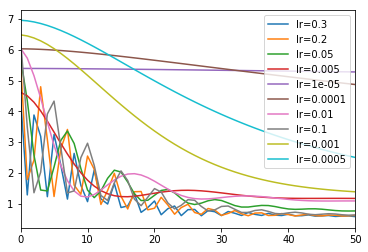

In [59]:
for lr, ys in loss_values.items():
    plt.plot(ys, label="lr={}".format(lr))
plt.legend()
plt.xlim(0, 50)

## Linear Regression: Keras

In [244]:
from keras.models import Sequential

In [245]:
from keras.layers import Dense

In [254]:
net = Sequential()
net.add(Dense(1, input_dim=8))

In [261]:
net.compile(loss='mse', optimizer='sgd')

In [262]:
net.fit(x, y_target)

Epoch 1/1
20640/20640 [==============================] - 1s 31us/step - loss: 0.9060
